In [2]:
!pip3 install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 61.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 75.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.4/265.4 KB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 110.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━

In [6]:
import numpy as np
import pandas as pd
import ktrain
from ktrain import text

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df= pd.read_csv("/content/drive/MyDrive/tweet_and_emotion.csv")

In [8]:
df.shape

(10624, 2)

In [9]:
print(df.emotions.value_counts())

fear       2252
neutral    2238
sadness    2198
joy        2125
anger      1811
Name: emotions, dtype: int64


In [10]:
data_set = df['tweet']
target= df['emotions']

In [11]:
class_names = ["fear","neutral","sadness","joy","anger"]

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(data_set, target , test_size=0.2 ,random_state=42)

In [13]:
x_train = x_train.tolist()
x_test = x_test.tolist()

y_train = y_train.tolist()
y_test = y_test.tolist()

In [14]:
encoding = {
  "fear":0,
  "neutral":1,
 "sadness":2,
  "joy":3,
 "anger":4,
}

# Integer values for each class
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

In [15]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                       x_test=x_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=350, 
                                                                       max_features=35000)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


In [16]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 350


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


In [17]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input-Token (InputLayer)       [(None, 350)]        0           []                               
                                                                                                  
 Input-Segment (InputLayer)     [(None, 350)]        0           []                               
                                                                                                  
 Embedding-Token (TokenEmbeddin  [(None, 350, 768),  23440896    ['Input-Token[0][0]']            
 g)                              (30522, 768)]                                                    
                                                                                                  
 Embedding-Segment (Embedding)  (None, 350, 768)     1536        ['Input-Segment[0][0]']    

In [18]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), 
                             val_data=(x_test, y_test),
                             batch_size=6)

In [19]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
1417/1417 [==============================] - 775s 528ms/step - loss: 4.7338 - accuracy: 0.2842
Epoch 2/1024
1417/1417 [==============================] - 2s 755us/step - loss: 55.7390 - accuracy: 0.2222


/usr/local/lib/python3.9/dist-packages/ktrain/lroptimize/lrfinder.py:267: UserWarning: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.
  warnings.warn(str(e))




done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


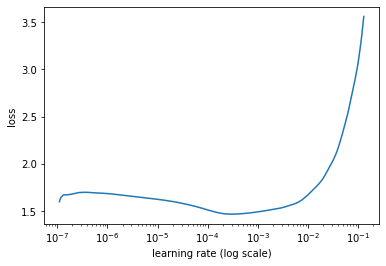

In [20]:
learner.lr_plot()

In [21]:
learner.fit_onecycle(1e-5, 3)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/3
1417/1417 [==============================] - 839s 577ms/step - loss: 1.2883 - accuracy: 0.4562 - val_loss: 0.7734 - val_accuracy: 0.7125
Epoch 2/3
1417/1417 [==============================] - 834s 589ms/step - loss: 0.6475 - accuracy: 0.7646 - val_loss: 0.5885 - val_accuracy: 0.7784
Epoch 3/3
1417/1417 [==============================] - 834s 589ms/step - loss: 0.4000 - accuracy: 0.8557 - val_loss: 0.6207 - val_accuracy: 0.7802


In [22]:
learner.validate(val_data=(x_test, y_test), class_names=class_names)

67/67 [==============================] - 67s 928ms/step
              precision    recall  f1-score   support

        fear       0.82      0.86      0.84       436
     neutral       0.69      0.76      0.72       443
     sadness       0.73      0.69      0.71       431
         joy       0.83      0.79      0.81       444
       anger       0.85      0.80      0.83       371

    accuracy                           0.78      2125
   macro avg       0.78      0.78      0.78      2125
weighted avg       0.78      0.78      0.78      2125



array([[375,  14,  24,   7,  16],
       [ 12, 337,  45,  40,   9],
       [ 30,  67, 297,  17,  20],
       [ 17,  56,  13, 351,   7],
       [ 24,  17,  26,   6, 298]])

In [23]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
predictor.save("models/tweet_emotion_model")